In [173]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('Iris.csv',index_col=0)

# Select useful features
X = df[['SepalLengthCm','PetalLengthCm']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

# Select K
K = 3

Data size:
(150, 2)


## Scaling

In [174]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Clustering

### Distance metric: Euclidean

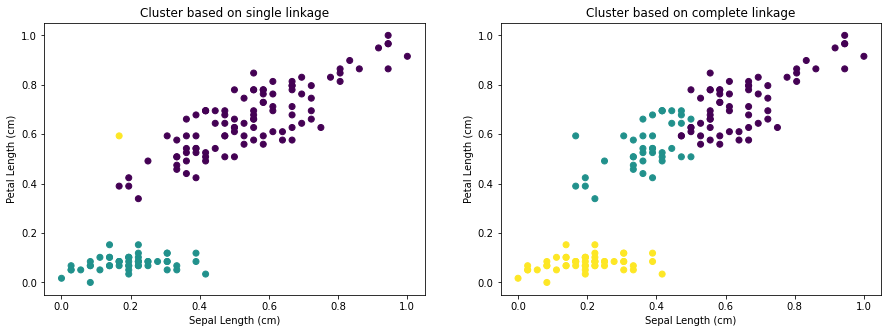

In [175]:
plt.figure(figsize=[15,5])

linkage_types = ['single', 'complete']

for i, l in enumerate(linkage_types):
    plt.subplot(1, 2, i+1)
    
    cluster1 = AgglomerativeClustering(n_clusters=K, metric='euclidean', linkage=l)
    cluster1.fit_predict(X)
    
    ax = plt.scatter(X[:,0], X[:,1], c=cluster1.labels_)
    
    plt.title('Cluster based on {} linkage'.format(l))
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal Length (cm)')

### Distance metric: Cityblock

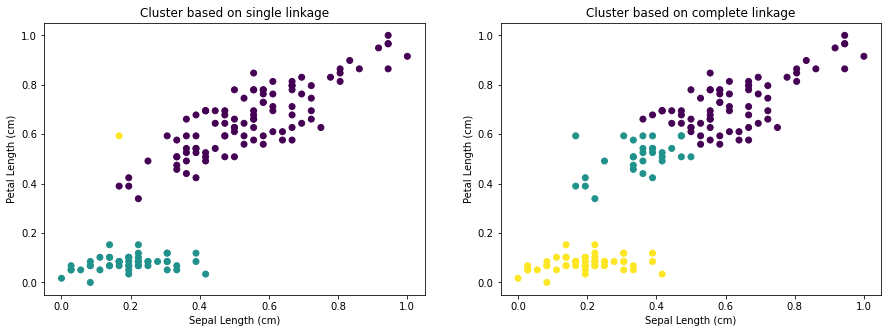

In [176]:
plt.figure(figsize=[15,5])

for i, l in enumerate(linkage_types):
    plt.subplot(1, 2, i+1)
    
    cluster2 = AgglomerativeClustering(n_clusters=K, metric='cityblock', linkage=l)
    cluster2.fit_predict(X)
    
    ax = plt.scatter(X[:,0], X[:,1], c=cluster2.labels_)
    
    plt.title('Cluster based on {} linkage'.format(l))
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal Length (cm)')

## Visualisations

### Dendrograms

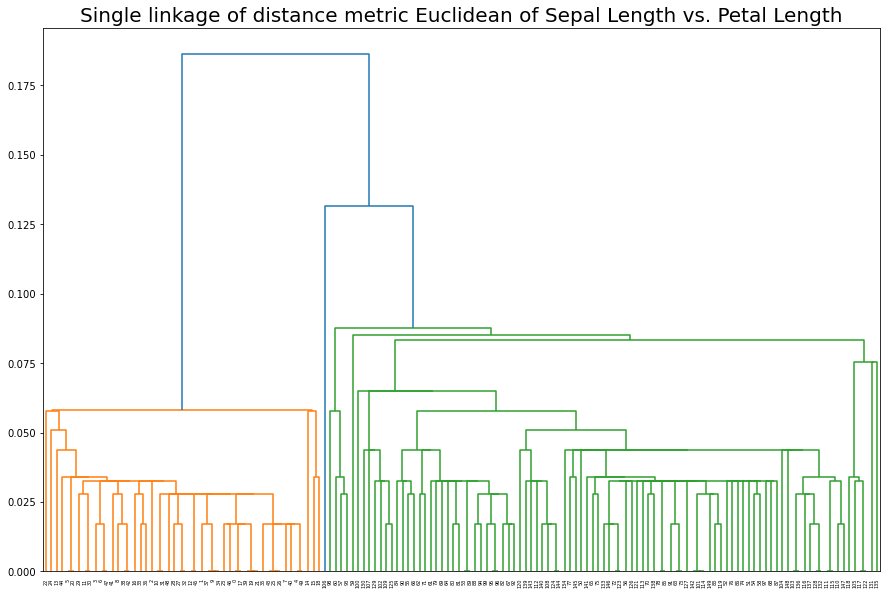

In [177]:
plt.figure(figsize=[15,10])
plt.title("Single linkage of distance metric Euclidean of Sepal Length vs. Petal Length", fontsize=20)  
dend1 = dendrogram(linkage(X, method='single', metric="euclidean"))

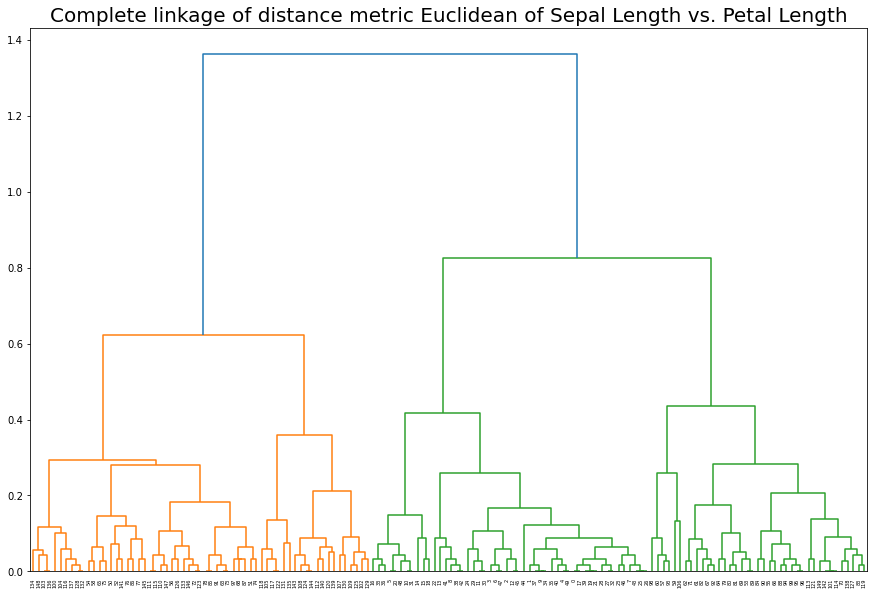

In [178]:
plt.figure(figsize=[15,10])
plt.title("Complete linkage of distance metric Euclidean of Sepal Length vs. Petal Length", fontsize=20)  
dend2 = dendrogram(linkage(X, method='complete', metric="euclidean"))  

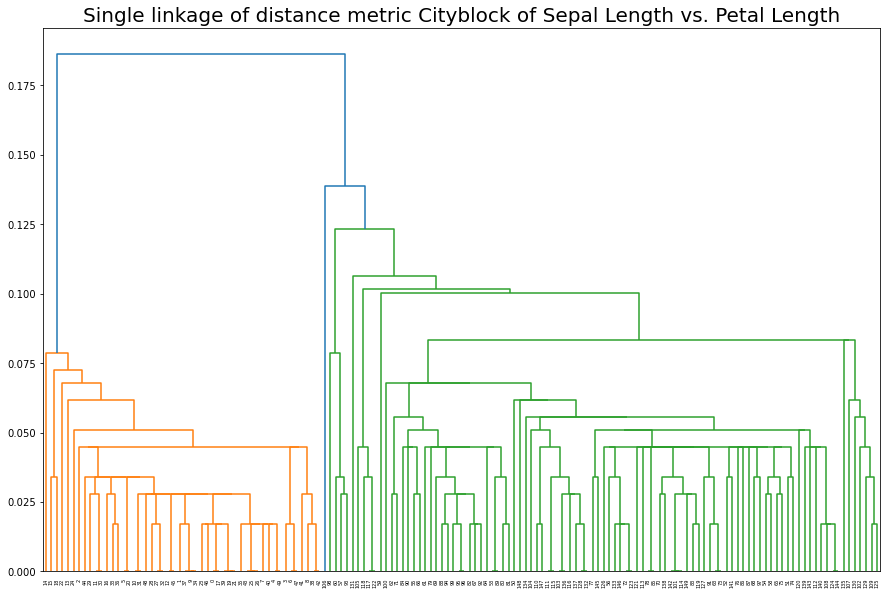

In [179]:
plt.figure(figsize=[15,10])
plt.title("Single linkage of distance metric Cityblock of Sepal Length vs. Petal Length", fontsize=20)  
dend3 = dendrogram(linkage(X, method='single', metric="cityblock"))  

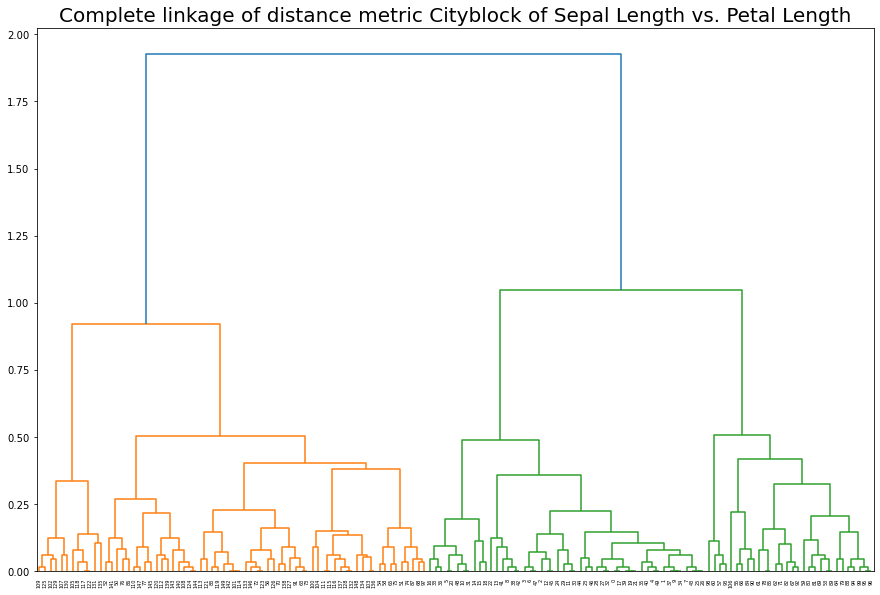

In [180]:
plt.figure(figsize=[15,10])
plt.title("Complete linkage of distance metric Cityblock of Sepal Length vs. Petal Length", fontsize=20)  
dend4 = dendrogram(linkage(X, method='complete', metric="cityblock"))  

## AHC @ linkage='complete, metric='euclidean'

* Based on the dendrogram where the linkage is complete and the distance metric is Euclidean it suggested that k=2.

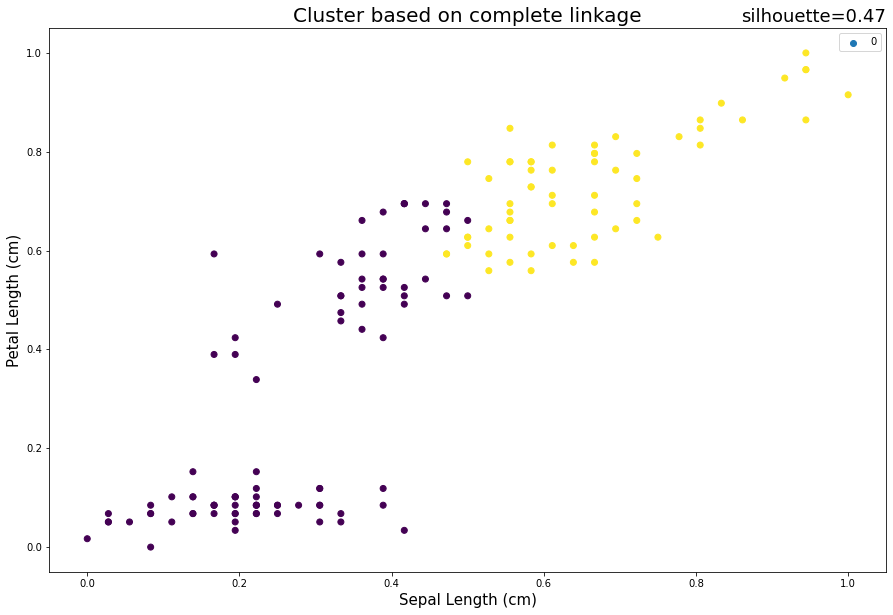

In [181]:
plt.figure(figsize=[15,10])

cluster3 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
cluster3.fit_predict(X)
    
ax = plt.scatter(X[:,0], X[:,1], c=cluster3.labels_)

score = round(silhouette_score(X, cluster3.labels_, metric='euclidean'),2)
plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 18}, pad=-14)
plt.title('Cluster based on {} linkage'.format(l), fontsize=20)
plt.xlabel('Sepal Length (cm)', fontsize=15)
plt.ylabel('Petal Length (cm)', fontsize=15)
plt.legend(cluster3.labels_)
    

## Interpretation

Although both the single linkages of distance metrics Euclidean and Cityblock where able to distinguish between 3 cluster, one of the clusters only contains one single entries thus these dendrograms where not selected.

On the other hand, both complete linkage dendrograms of distance metrics Euclidean and Cityblock where not able to distinguish that there are 3 clusters in the data in the dendrograms. 

The dendrogram of complete linkage and distance metric Euclidean was selected as the clusters identified where more dissimilar compared to the complete linkage Cityblock dendrogram.

Suprisingly, this model is having diffuculty distinguishing between Iris-Setosa and Iris-Versicolor. Additionally, the silhouette scores is 0.47, which suggests that the clusters are not that easily distinguishable as thus not well spaced apart.

However, if the desired cluster size is increased to 3 despite the suggested values of 2 by the dendrogram, all three clusters are distinguishable and the silhouette scores increases to 0.52. Although a slight improvement, both silhoutte scores indicated that there is still a higher then desirable chance that data points will be assigned to the wrong cluster although the vaalues are informative. Thus, additional analysis would have to be peformed. 